## Import the necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Create a random dataset for the travelling salesman problem

In this project we will investigate a problem with 30 nodes and (30*29)/2 = 435 weighted edges. Assume the cost to travel from one city to another is equivalent to that of returning from another city, i.e. The Symmetric TSP. Also we assume the cost of travelling from A to B, then to C is always greater than or equal to travelling directly from A to C, i.e. it satisfies the triangle inequality. 

In [3]:
np.random.seed(42)

In [4]:
X = np.random.uniform(-10,10,(30,))
X

array([-2.50919762,  9.01428613,  4.63987884,  1.97316968, -6.87962719,
       -6.88010959, -8.83832776,  7.32352292,  2.02230023,  4.16145156,
       -9.58831011,  9.39819704,  6.64885282, -5.75321779, -6.36350066,
       -6.3319098 , -3.91515514,  0.49512863, -1.36109963, -4.1754172 ,
        2.23705789, -7.21012279, -4.15710703, -2.67276313, -0.87860032,
        5.70351923, -6.00652436,  0.28468877,  1.84829138, -9.07099175])

In [5]:
Y = np.random.uniform(-10,10,(30,))
Y

array([ 2.15089704, -6.58951753, -8.69896814,  8.97771075,  9.31264066,
        6.16794696, -3.90772462, -8.04655772,  3.68466053, -1.19695013,
       -7.5592353 , -0.0964618 , -9.31222958,  8.18640804, -4.82440037,
        3.25044569, -3.76577848,  0.40136042,  0.93420559, -6.30291089,
        9.39169256,  5.50265647,  8.78997883,  7.89654701,  1.95799958,
        8.4374847 , -8.23014996, -6.08034275, -9.09545422, -3.49339338])

In [6]:
Nodes = [(x,y) for x,y in zip(X,Y)]
Nodes

[(-2.50919762305275, 2.1508970380287664),
 (9.014286128198322, -6.58951752625417),
 (4.639878836228101, -8.69896814029441),
 (1.973169683940732, 8.977710745066666),
 (-6.87962719115127, 9.312640661491187),
 (-6.880109593275947, 6.167946962329221),
 (-8.83832775663601, -3.9077246165325867),
 (7.323522915498703, -8.046557719872322),
 (2.0223002348641756, 3.6846605302431374),
 (4.161451555920909, -1.196950125207973),
 (-9.588310114083951, -7.5592353031044235),
 (9.398197043239886, -0.09646179777459629),
 (6.648852816008436, -9.312229577695632),
 (-5.753217786434477, 8.186408041575643),
 (-6.363500655857988, -4.824400367999662),
 (-6.331909802931324, 3.2504456870796403),
 (-3.9151551408092455, -3.7657784782117805),
 (0.49512863264475726, 0.40136042355621626),
 (-1.3610996271576852, 0.934205586865593),
 (-4.175417196039161, -6.302910889489459),
 (2.23705789444759, 9.391692555291172),
 (-7.210122786959163, 5.502656467222291),
 (-4.157107029295637, 8.789978831283783),
 (-2.672763134126166, 7.

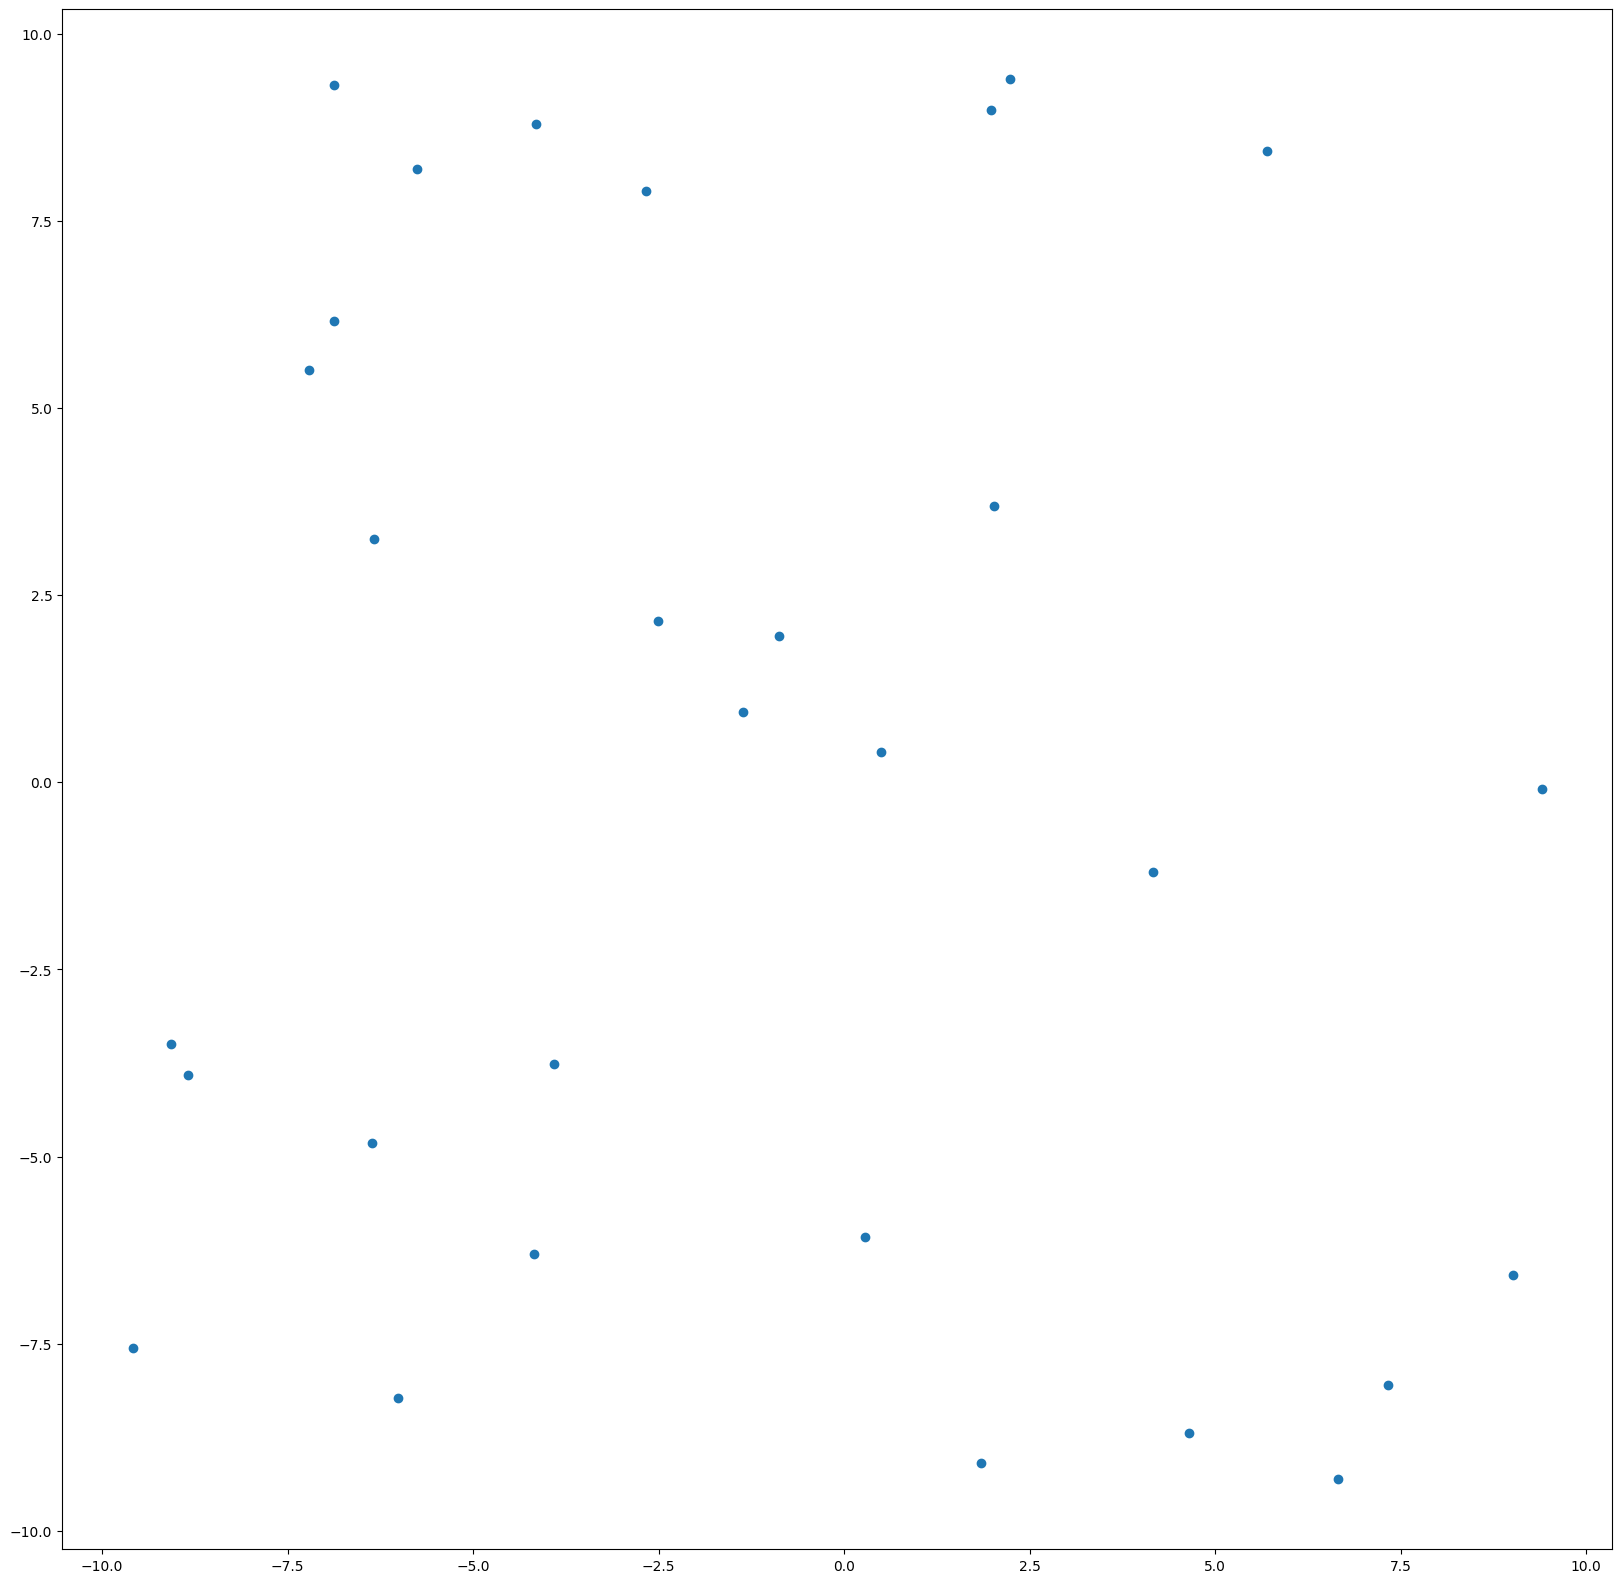

In [7]:
plt.figure(figsize=(20,20))
plt.scatter(X,Y)

In [8]:
Edges = []

for node1 in Nodes:
    edge = []
    for node2 in Nodes:
        if node1 == node2:
            edge.append(np.inf)
        else:
            edge.append(np.sqrt((node1[0]-node2[0])**2.0  + (node1[1]-node2[1])**2.0))
    Edges.append(edge)

Edges = np.array(Edges)
Edges

array([[        inf, 14.46324737, 12.99341636,  8.16682325,  8.38994793,
         5.93646035,  8.7615515 , 14.16582072,  4.78402585,  7.46362118,
        12.01667607, 12.11761814, 14.67219001,  6.85208435,  7.96934287,
         3.97770482,  6.08142793,  3.4766154 ,  1.67286195,  8.61644684,
         8.65771686,  5.77347284,  6.84054183,  5.74797767,  1.64196742,
        10.34262551, 10.95433389,  8.69247431, 12.06101683,  8.65535421],
       [14.46324737,         inf,  4.85646178, 17.08554702, 22.48321853,
        20.38098907, 18.05291765,  2.23196021, 12.42765471,  7.25463897,
        18.62785386,  6.50439546,  3.6067209 , 20.89036018, 15.47875851,
        18.22993707, 13.23419638, 11.02036383, 12.81620221, 13.19281688,
        17.35885648, 20.23492319, 20.24881493, 18.61271571, 13.07399139,
        15.38739658, 15.11014303,  8.74443417,  7.59152155, 18.34838577],
       [12.99341636,  4.85646178,         inf, 17.87669752, 21.38029632,
        18.80785203, 14.30447718,  2.76180827, 12

## Form The Minimum Spanning Tree for the graph with the Nodes amd Edges given above

In this project, we will use the cost defined by the minimum spanning tree as the benchmark for the  result of different algorithms to solve the travelling salesman problem.(Its cost must always be less than or equal to the cost of the optimal solution to the TSP because by removing one edge from any tour, we will always get a complete graph without cycles, i.e. a tree and its cost is always larger than or equal to that of the MST).


We will use the Prim's algorithm to find the minimum spanning tree.


The Prim's algorithm is defined as follows:
1. Start with a random node
2. Find the edge with the minimum cost from the current tree to another node not included in the tree
3. Add the node to the tree
4. Repeat steps 2 and 3 until all nodes are added to the tree

In [9]:
# The Prim's algorithm to find the minimum spanning tree
def Prim(Edges):
    init = np.random.randint(0,30) # Randomly select a node to start with
    unvisited = list(range(30))    # List of nodes not included in the tree
    unvisited.remove(init)         # Remove the initial node from the list of unvisited nodes
    visited = [init]                  # List of nodes included in the tree
    tree = []                       # List of edges included in the tree
    cost = 0                       # Cost of the tree

    for _ in range(29):
    # Find the edge with the minimum cost from the current tree to another node not included in the tree
        min_cost = np.inf
        for node1 in visited:
            for node2 in unvisited:
                if Edges[node1,node2] < min_cost:
                    min_cost = Edges[node1,node2]
                    min_node1 = node1
                    min_node2 = node2
        # Add the node to the tree
        visited.append(min_node2)
        unvisited.remove(min_node2)
        tree.append((min_node1,min_node2))
        cost += min_cost

    return tree,cost

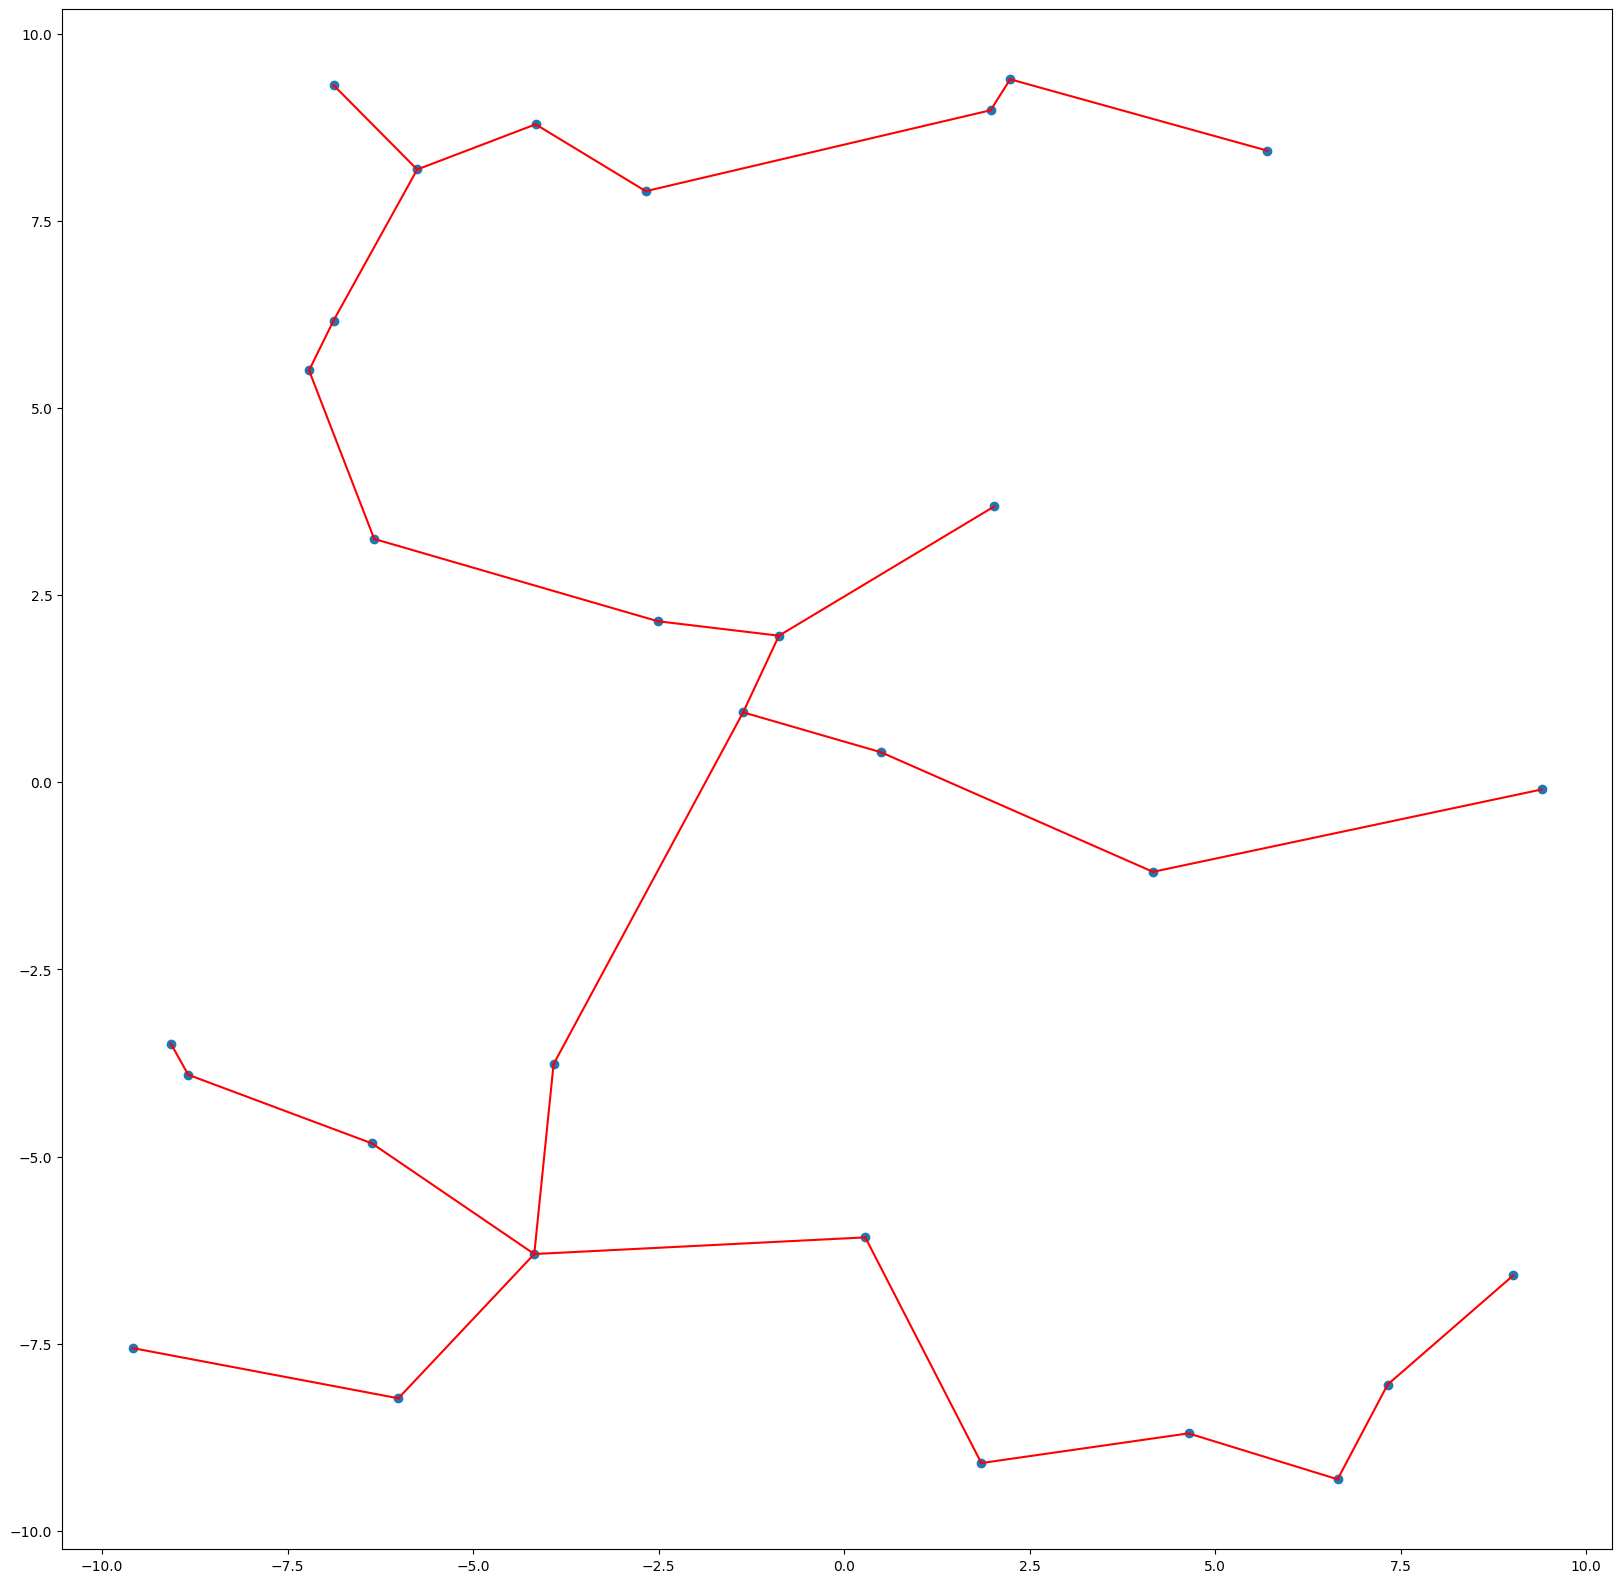

In [10]:
# Visualize the tree
tree = Prim(Edges)[0]
plt.figure(figsize=(20,20))
plt.scatter(X,Y)
for edge in tree:
    plt.plot([X[edge[0]],X[edge[1]]],[Y[edge[0]],Y[edge[1]]],'r')

## The Christofides algorithm

The idea of the Christofides algorithm comes from the fact that the MST might share some edges with the optimal solution to the TSP. So we can somehow modify the MST to make it a tour to be a better approximation to the problem.

The Christofides algorithm is defined as follows:
1. Find the minimum spanning tree of the graph
2. Find the set of nodes with odd degree in the MST
3. Find the minimum weight perfect matching of the nodes with odd degree
4. Add the edges of the matching to the MST to make all the nodes have even degree
5. Find an Eulerian tour of the graph (We can onlt do this when all the nodes have even degree)
6. Make the Eulerian tour a Hamiltonian tour by skipping the repeated nodes
7. Return the Hamiltonian tour as the result for the TSP problem

In [56]:
# THE CHRISTOFIDES ALGORITHM

# Find the minimum spanning tree of the graph
tree,cost = Prim(Edges)

# Find the set of nodes with odd degree in the MST
odd_nodes = []
for node in range(30):
    degree = 0
    for edge in tree:
        if node in edge:
            degree += 1
    if degree % 2 == 1:
        odd_nodes.append(node)




False

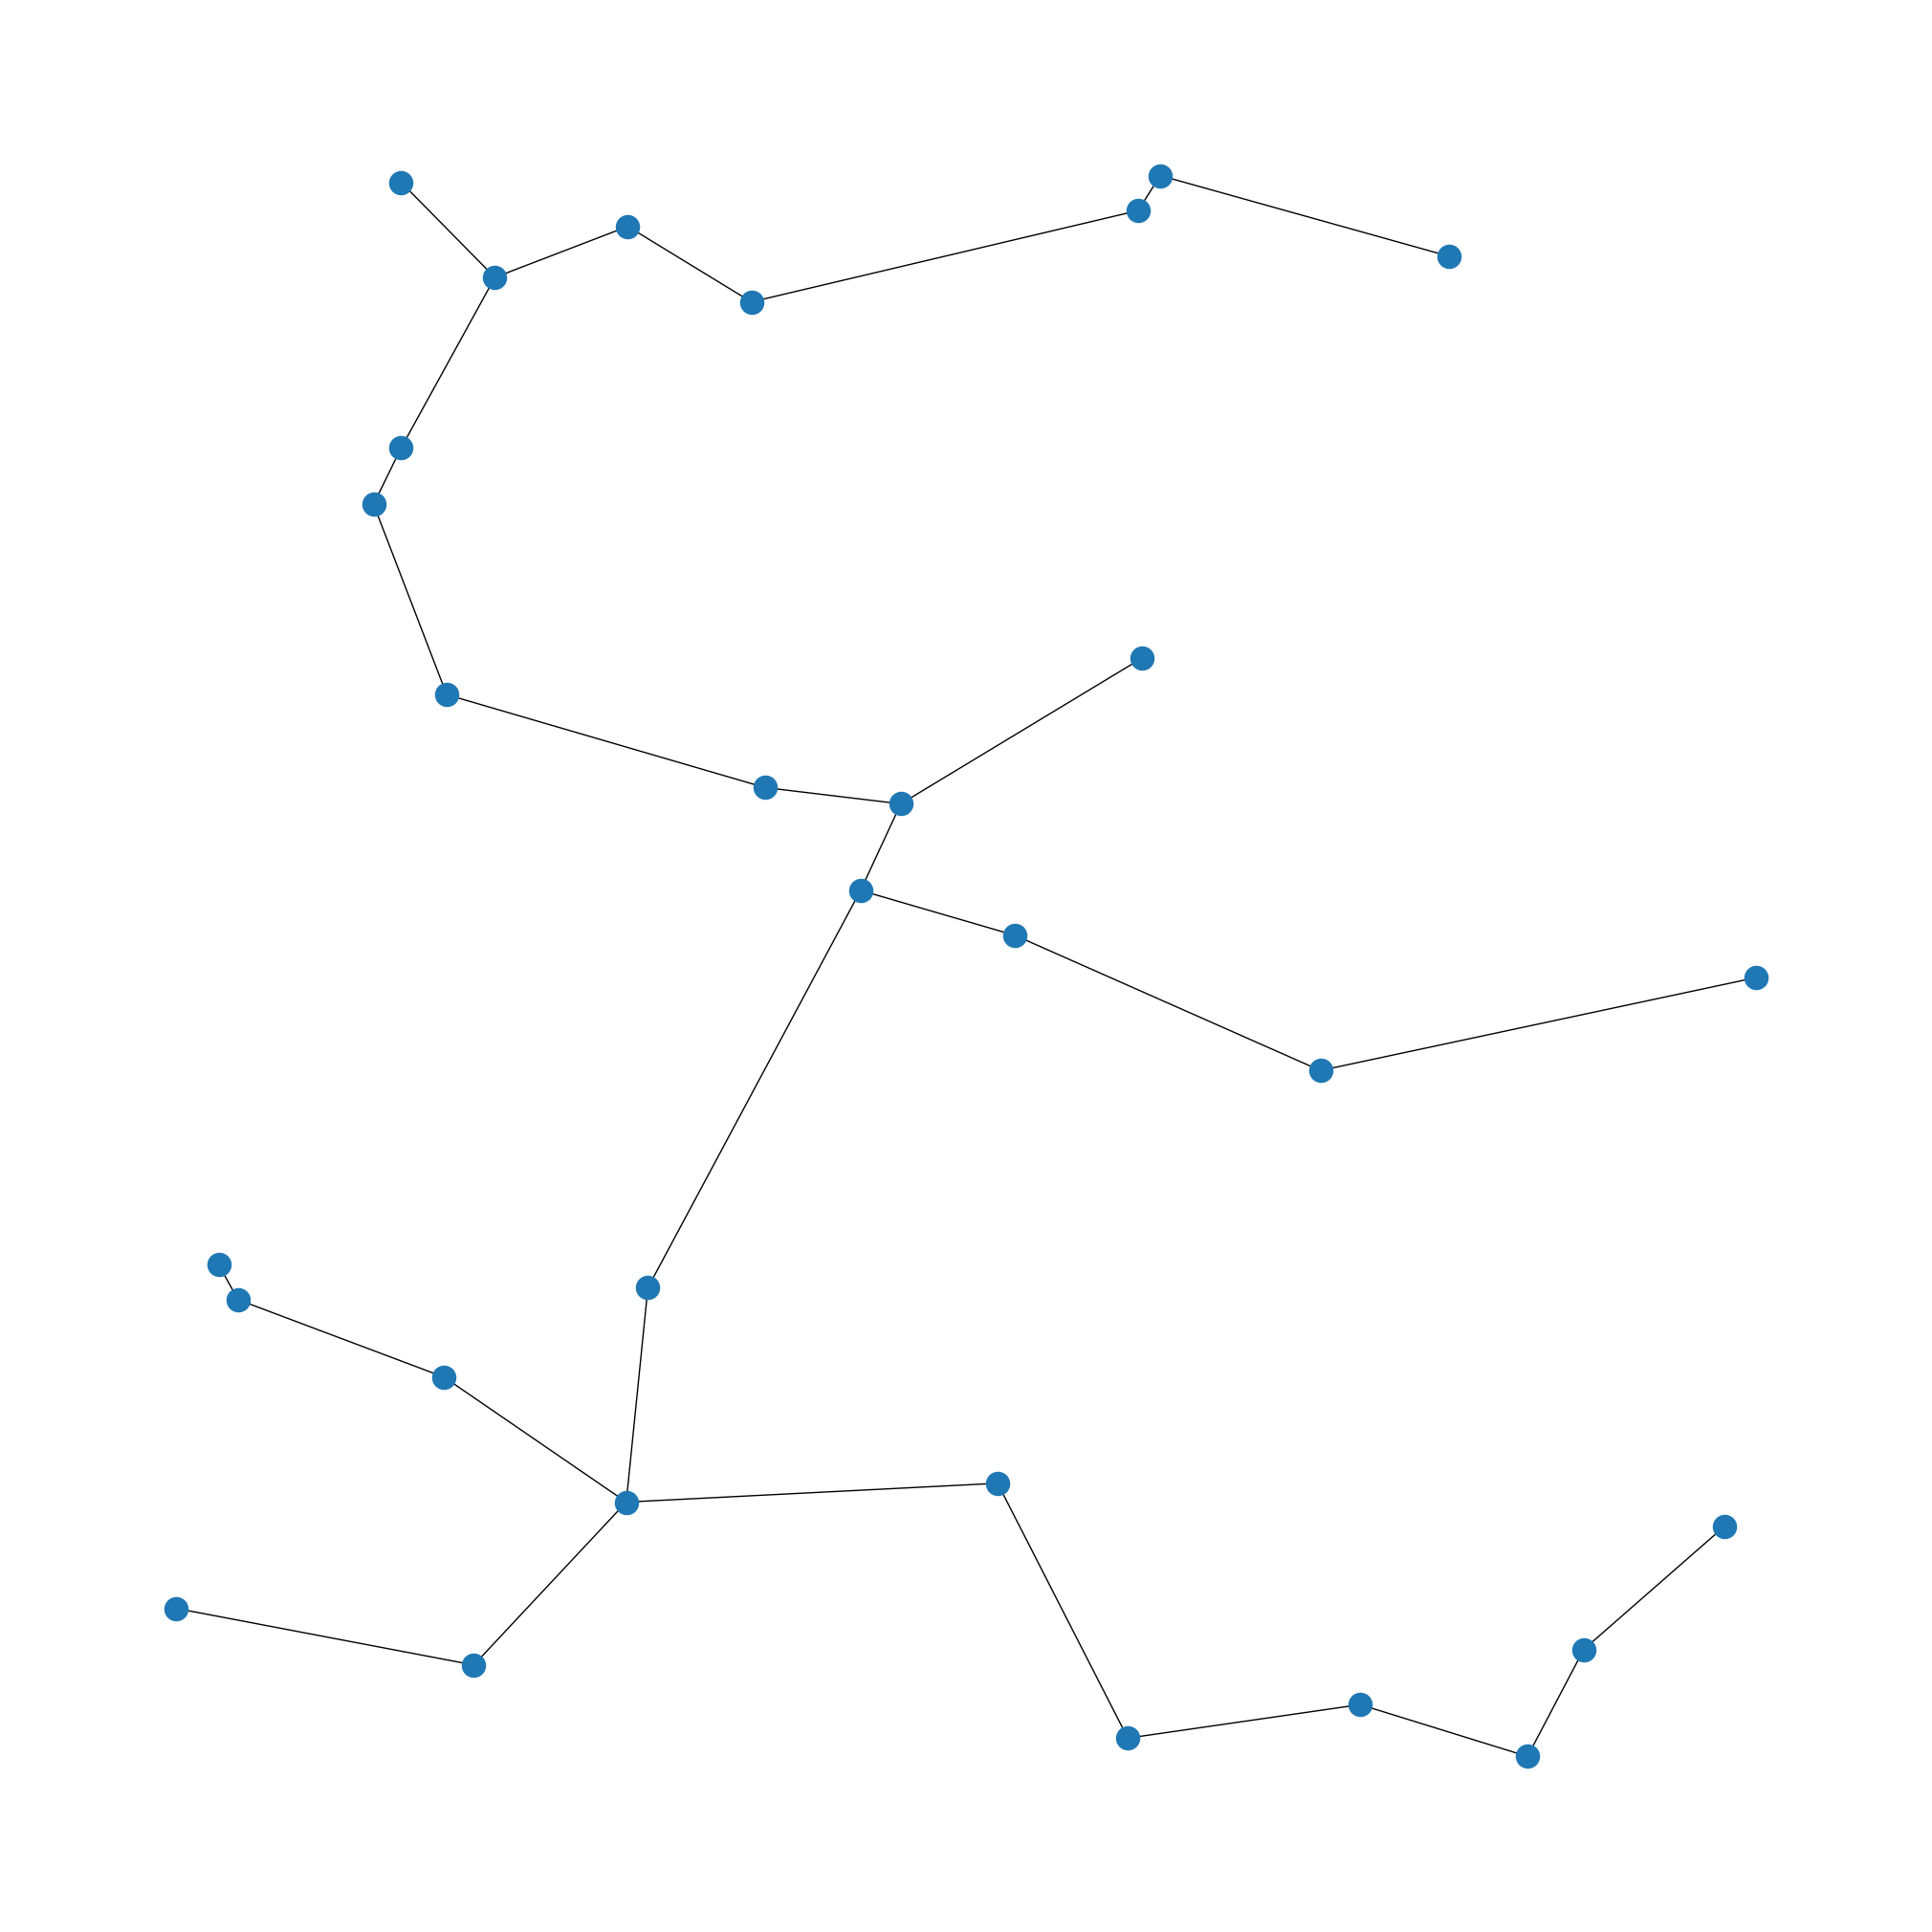

In [57]:
import networkx as nx
Tree = nx.MultiGraph()
for i in range(30):
    Tree.add_node(i,pos = Nodes[i])

for edge in tree:
    Tree.add_edge(edge[0],edge[1],weight = Edges[edge[0],edge[1]])

plt.figure(figsize=(20,20))
nx.draw(Tree,nx.get_node_attributes(Tree,'pos'))

In [58]:
odd_tree = nx.Graph()
for odd_node in odd_nodes:
    odd_tree.add_node(odd_node,pos = Nodes[odd_node])

for odd_node1 in odd_nodes:
    for odd_node2 in odd_nodes:
        if odd_node1 != odd_node2:
            odd_tree.add_edge(odd_node1,odd_node2,weight = Edges[odd_node1,odd_node2])

# Find the perfect matching for the odd nodes
odd_matching = nx.algorithms.min_weight_matching(odd_tree)
odd_matching

{(1, 11), (4, 13), (8, 25), (10, 29), (24, 18)}

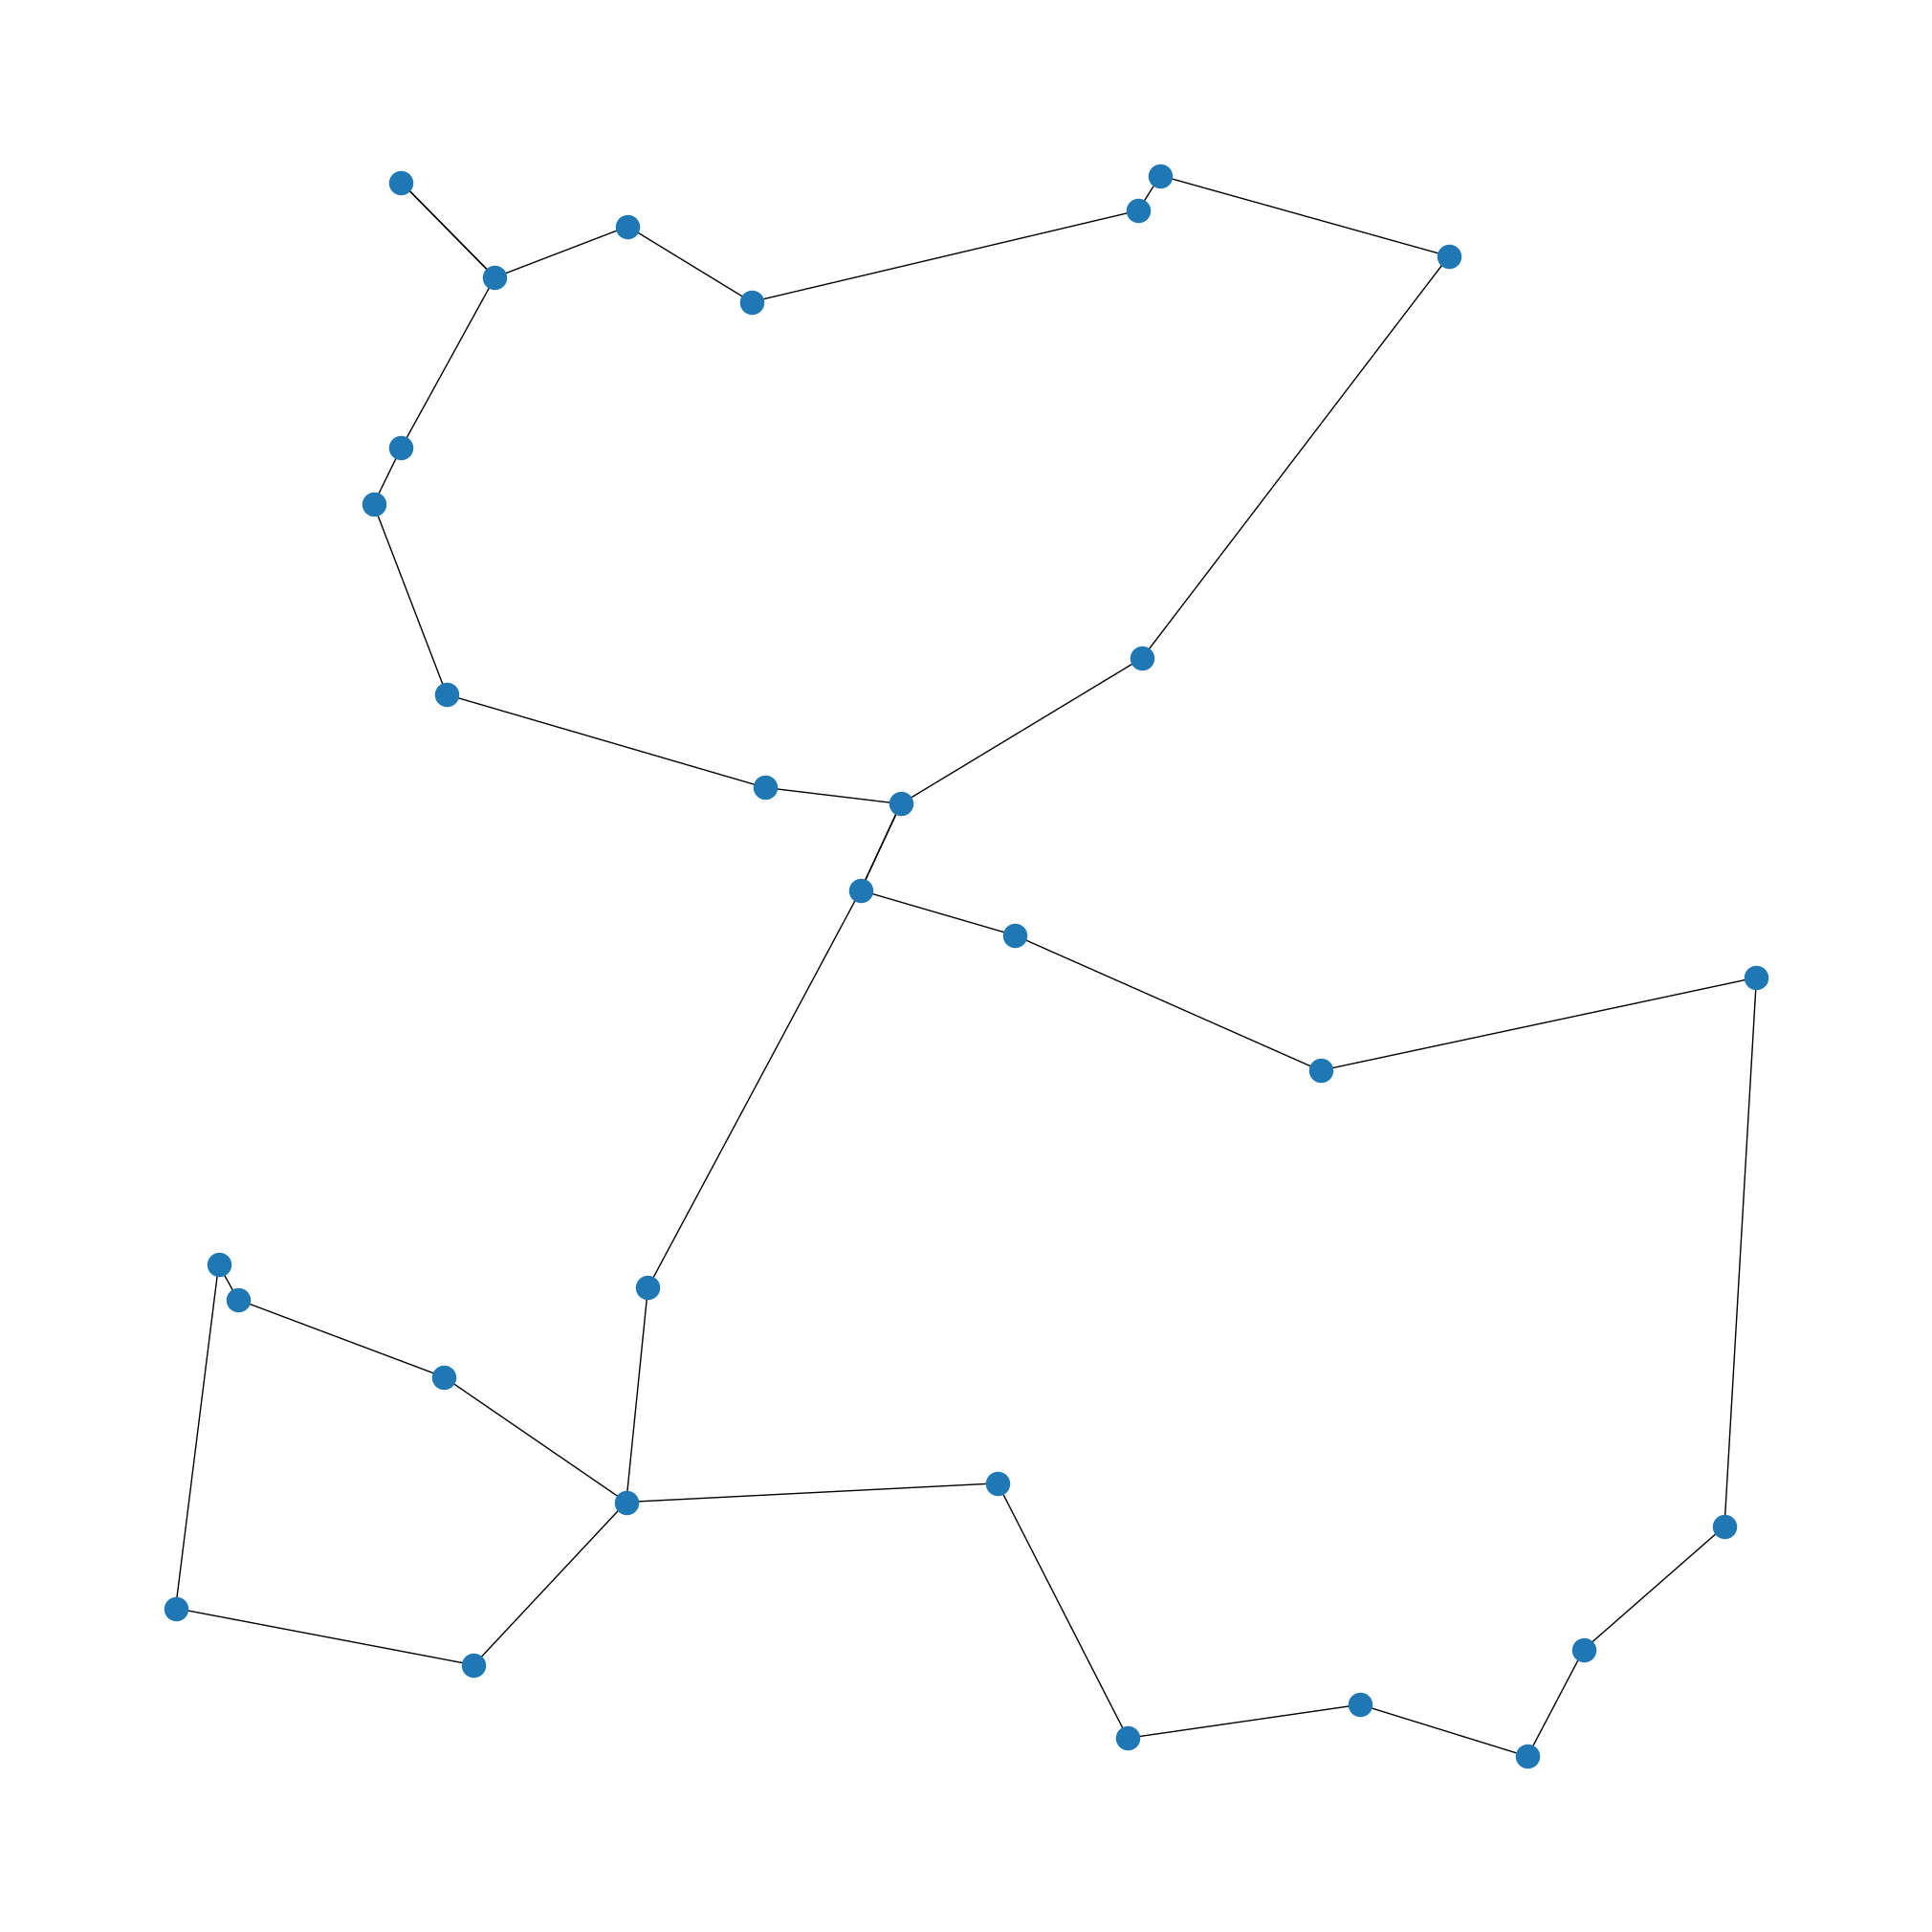

In [59]:
# Add the edges of the matching to the MST to make all the nodes have even degree
for edge in odd_matching:
    Tree.add_edge(edge[0],edge[1],weight = Edges[edge[0],edge[1]])

plt.figure(figsize=(20,20))
nx.draw(Tree,nx.get_node_attributes(Tree,'pos'))

In [60]:
# Find an Eulerian tour of the graph
odd_nodes = []
for node in Tree.nodes():
    degree = 0
    for edge in Tree.edges():
        if node in edge:
            degree += 1
    if degree % 2 == 1:
        odd_nodes.append(node)

odd_nodes

[]

In [64]:
# Find an Eulerian tour of the graph
Eulerian_tour =  list(nx.eulerian_circuit(Tree))
Eulerian_tour

[(0, 15),
 (15, 21),
 (21, 5),
 (5, 13),
 (13, 4),
 (4, 13),
 (13, 22),
 (22, 23),
 (23, 3),
 (3, 20),
 (20, 25),
 (25, 8),
 (8, 24),
 (24, 18),
 (18, 17),
 (17, 9),
 (9, 11),
 (11, 1),
 (1, 7),
 (7, 12),
 (12, 2),
 (2, 28),
 (28, 27),
 (27, 19),
 (19, 26),
 (26, 10),
 (10, 29),
 (29, 6),
 (6, 14),
 (14, 19),
 (19, 16),
 (16, 18),
 (18, 24),
 (24, 0)]

In [65]:
# Make the Eulerian tour a Hamiltonian tour by skipping the repeated nodes
Hamiltonian_tour = []
for edge in Eulerian_tour:
    if edge[0] not in Hamiltonian_tour:
        Hamiltonian_tour.append(edge[0])
    if edge[1] not in Hamiltonian_tour:
        Hamiltonian_tour.append(edge[1])

Hamiltonian_tour.append(Hamiltonian_tour[0])
Hamiltonian_tour

[0,
 15,
 21,
 5,
 13,
 4,
 22,
 23,
 3,
 20,
 25,
 8,
 24,
 18,
 17,
 9,
 11,
 1,
 7,
 12,
 2,
 28,
 27,
 19,
 26,
 10,
 29,
 6,
 14,
 16,
 0]

In [66]:
# Calculate the cost of the tour
cost = 0
for i in range(30):
    cost += Edges[Hamiltonian_tour[i],Hamiltonian_tour[i+1]]

cost

91.42179799292917